<a href="https://colab.research.google.com/github/GA239/DS_course/blob/master/HW7/TSK1/TF2_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
! pip install tensorflow-gpu

In [42]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [43]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline

In [44]:
DRIVE = '/content/drive/My Drive'

In [45]:
Xtrain = pd.read_csv(os.path.join(DRIVE, 'X_train.csv'), index_col=0).astype(np.float32)
Xtest = pd.read_csv(os.path.join(DRIVE, 'X_test.csv'), index_col=0).astype(np.float32)
Ytrain = pd.read_csv(os.path.join(DRIVE, 'Y_train.csv'), index_col=0).astype(np.float32)
Ytest = pd.read_csv(os.path.join(DRIVE, 'Y_test.csv'), index_col=0).astype(np.float32)

In [46]:
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape 

((2967, 378), (742, 378), (2967, 3), (742, 3))

In [47]:
w = tf.Variable(tf.ones(shape=(Xtrain.shape[1], Ytrain.shape[1])), name="W")
b = tf.Variable(tf.zeros(shape=(Ytrain.shape[1])), name="b")

N_EPOCHS = 200
display_step = 1000 
optimizer = tf.optimizers.Adam()

In [48]:
def predict(x):
    # return tf.linalg.matmul(x, w) + b 
    return tf.math.sigmoid(tf.linalg.matmul(x, w) + b)

@tf.function
def lossf(y_, y):
  return tf.math.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
      labels=y, logits=y_))

@tf.function
def accf(y_, y):
  preds = tf.nn.softmax(y_)
  correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
  return tf.math.reduce_mean(tf.cast(correct_preds, tf.float32))

def calculate(x, y):
  y_ = predict(x)
  loss = lossf(y_,y)
  acc = accf(y_,y)
  return loss, acc

def forward(x, y):
  with tf.GradientTape() as t:
      loss, acc = calculate(x, y)
      gradients = t.gradient(loss, [w, b])
      optimizer.apply_gradients(zip(gradients, [w, b]))
  return loss, acc

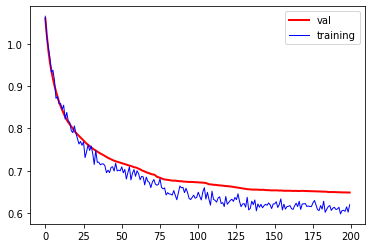

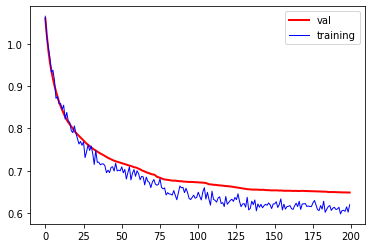

In [49]:
# print('\n--- до обучения ---\n')
# _, acc_train = calculate(np.array(Xtrain), np.array(Ytrain))
# print(f"Точность TRAIN: {acc_train}")
# _, acc_test = calculate(np.array(Xtest), np.array(Ytest))
# print(f"Точность TEST: {acc_test}")

def train_epoch(numsteps=50):
  for _ in range(numsteps):
    Xbatch = Xtrain.sample(400)
    Ybatch = Ytrain.loc[Xbatch.index]
    lossv, accv = forward(np.array(Xbatch), np.array(Ybatch))
  loss_test, acc_test = calculate(np.array(Xtest), np.array(Ytest))
  return lossv, loss_test

losses_train = []
losses_test = []
for i in range(N_EPOCHS):
  loss_train, loss_test = train_epoch()
  losses_train.append(loss_train)
  losses_test.append(loss_test)
  plt.clf()
  plt.plot(losses_test, 'r-', lw=2, label='val')
  plt.plot(losses_train, 'b-', lw=1, label='training')
  plt.legend()
  display.clear_output(wait=True)
  display.display(plt.gcf())